In [ ]:
!pip install --force-reinstall --no-deps torch==2.6.0 torchvision==0.16.0 torchaudio==2.6.0 pandas==2.2.2


  Using cached torch-2.6.0-cp311-cp311-manylinux1_x86_64.whl.metadata (28 kB)
  Using cached torchvision-0.16.0-cp311-cp311-manylinux1_x86_64.whl.metadata (6.6 kB)
  Using cached torchaudio-2.6.0-cp311-cp311-manylinux1_x86_64.whl.metadata (6.6 kB)
  Using cached pandas-2.2.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (19 kB)
Using cached torch-2.6.0-cp311-cp311-manylinux1_x86_64.whl (766.7 MB)
Using cached torchvision-0.16.0-cp311-cp311-manylinux1_x86_64.whl (6.9 MB)
Using cached torchaudio-2.6.0-cp311-cp311-manylinux1_x86_64.whl (3.4 MB)
Using cached pandas-2.2.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.0 MB)
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 2.6.0
    Uninstalling torchaudio-2.6.0:
      Successfully uninstalled torchaudio-2.6.0
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.16.0
    Uninstalling torchvision-0.16.0:
      Successfully uninstalled torchvision

In [ ]:
# 2. 기본 패키지 import
import numpy as np
import pandas as pd
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

/usr/local/lib/python3.11/dist-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/usr/local/lib/python3.11/dist-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [ ]:
# 3. MNIST 데이터셋 로딩 (torchvision 이용)
transform = transforms.Compose([
    transforms.ToTensor()
])

train_data = datasets.MNIST(root='./mnist_data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='./mnist_data', train=False, download=True, transform=transform)


In [ ]:
# 4. MNIST 데이터를 numpy 배열로 변환 후 pandas DataFrame으로 정리
def mnist_to_dataframe(dataset):
    images = dataset.data.numpy()
    labels = dataset.targets.numpy()
    images = images.reshape(images.shape[0], -1)  # 28x28 → 784
    df = pd.DataFrame(images)
    df['target'] = labels
    return df

df_train = mnist_to_dataframe(train_data)
df_test = mnist_to_dataframe(test_data)

print("Train shape:", df_train.shape)
print("Test shape:", df_test.shape)
df_train.head()

Train shape: (60000, 785)
Test shape: (10000, 785)


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [ ]:
!pip install pycaret==3.3.2


  Using cached pandas-2.1.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
Using cached pandas-2.1.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.2 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.1.4 which is incompatible.
plotnine 0.14.5 requires matplotlib>=3.8.0, but you have matplotlib 3.7.5 which is incompatible.
plotnine 0.14.5 requires pandas>=2.2.0, but you have pandas 2.1.4 which is incompatible.
mizani 0.13.3 requires pandas>=2.2.0, but you have pandas 2.1.4 which is incompatible.


In [ ]:
from pycaret.classification import *

# PyCaret 환경 설정 (진행 상황 출력)
clf = setup(data=df_train, target='target', session_id=123, fold=5, verbose=True)

# 여러 모델 성능 비교 (진행 상황 출력)
slow_models = ['xgboost', 'lightgbm', 'catboost', 'gpc', 'mlp']
best_model = compare_models(exclude=slow_models,verbose=True)


,Description,Value
0,Session id,123
1,Target,target
2,Target type,Multiclass
3,Original data shape,"(60000, 785)"
4,Transformed data shape,"(60000, 785)"
5,Transformed train set shape,"(42000, 785)"
6,Transformed test set shape,"(18000, 785)"
7,Numeric features,784
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9673,0.9988,0.9673,0.9674,0.9673,0.9637,0.9637,22.4180
knn,K Neighbors Classifier,0.9664,0.9947,0.9664,0.9667,0.9663,0.9626,0.9627,33.6060
rf,Random Forest Classifier,0.9643,0.9987,0.9643,0.9643,0.9643,0.9603,0.9603,24.2760
gbc,Gradient Boosting Classifier,0.9414,0.0000,0.9414,0.9415,0.9414,0.9349,0.9349,1169.6340
lr,Logistic Regression,0.8986,0.0000,0.8986,0.8984,0.8984,0.8873,0.8874,135.1140
svm,SVM - Linear Kernel,0.8761,0.0000,0.8761,0.8830,0.8762,0.8622,0.8630,55.8580
lda,Linear Discriminant Analysis,0.8619,0.0000,0.8619,0.8639,0.8618,0.8465,0.8467,11.3040
dt,Decision Tree Classifier,0.8535,0.9187,0.8535,0.8534,0.8534,0.8371,0.8372,10.9260
ridge,Ridge Classifier,0.8479,0.0000,0.8479,0.8488,0.8463,0.8309,0.8314,2.3920
ada,Ada Boost Classifier,0.7065,0.0000,0.7065,0.7059,0.7035,0.6737,0.6743,26.7500


Processing:   0%|          | 0/45 [00:00<?, ?it/s]

from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('  ').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# 6. 최적 모델 출력
print(best_model)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)


In [ ]:
# 7. 최적 모델로 테스트셋 예측 및 평가
# 먼저 모델 학습 (자동으로 train set에서 cross validation됨)
final_model = finalize_model(best_model)

# test 데이터셋 예측
predictions = predict_model(final_model, data=df_test)

# 예측 결과 보기
from sklearn.metrics import accuracy_score
y_true = df_test['target']
y_pred = predictions['prediction_label']

acc = accuracy_score(y_true, y_pred)
print(f"PyCaret AutoML Test Accuracy: {acc:.4f}")


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9733,0.9993,0.9733,0.9733,0.9733,0.9703,0.9703


✅ PyCaret AutoML Test Accuracy: 0.9733


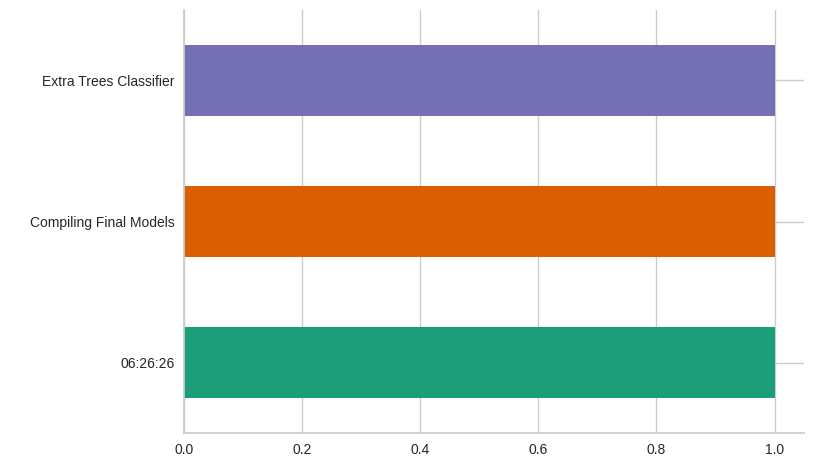

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('  ').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# ✅ 8. 평가 리포트와 시각화
evaluate_model(final_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…